<a href="https://colab.research.google.com/github/Mohadese-ghayoomi/EulerProjectSolution/blob/master/ASSIGNMENT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from time import time
from datetime import datetime
import io
import itertools
from packaging import version
from six.moves import range

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
from google.colab import drive; drive.mount('/content/drive')
import os
os.getcwd()
%cd /content/drive/My Drive/Colab Notebooks
from datasets import MNISTDataset

TensorFlow version:  2.2.0-rc3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [0]:
# Download the data. The data is already divided into train and test.
# The labels are integers representing classes.
mnist = keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = \
    mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))
# Names of the integer classes, i.e., 0 -> T-short/top, 1 -> Trouser, etc.
class_names = ['zero','one', 'Two', 'Three', 'Four', 'Five',
               'Six', 'Seven', 'eight', 'nine', 'ten']

# **FAIL1**
The error in this file is solved using Hyperparameter tuning.
A few reasons for the cause of NaN errors is: a) Cross_ entropy or b) large number of connected layers.
The number of connected layers in this example was 8. By tuning the hyperparameter, it was found that the layers above 4 caused an overflow leading to the NaN error.

In [0]:
# define the model first, from input to output

# this is a super deep model, cool!

n_units = 100
n_layers = 8
w_range = 0.4

# just set up a "chain" of hidden layers
layers = []

for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


NameError: ignored

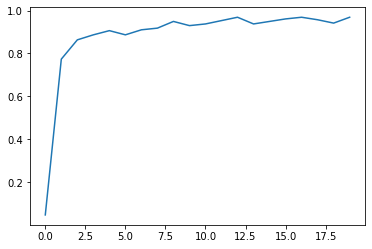

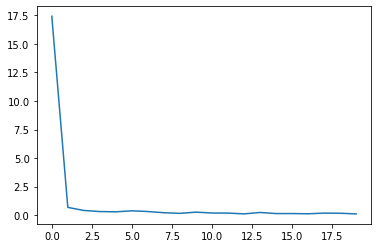

In [0]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail2**
This error was found to be a vanishing gradient problem which is usually solved by ReLU.
The vanishing gradient problem arises due to the nature of the back-propagation optimization which occurs in neural network training . The weight and bias values in the various layers within a neural network are updated each optimization iteration by stepping in the direction of the gradient of the weight/bias values with respect to the loss function. The vanishing gradient problem is particularly problematic with sigmoid activation functions. This can occur when the weights of our networks are initialized poorly – with too-large negative and positive values. These too-large values saturate the input to the sigmoid and pushes the derivatives into the small valued regions.

In [0]:
# define the model first, from input to output


# this is a super deep model, cool!
n_units = 100
n_layers = 4
w_range = 0.1

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense( 
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 2.3026835918426514 Accuracy: 0.09765625
Loss: 2.241809844970703 Accuracy: 0.39453125
Loss: 1.0344064235687256 Accuracy: 0.69140625
Starting new epoch...
Loss: 0.5968347787857056 Accuracy: 0.796875
Loss: 0.45443472266197205 Accuracy: 0.859375
Starting new epoch...
Loss: 0.29932066798210144 Accuracy: 0.91796875
Loss: 0.31462037563323975 Accuracy: 0.921875
Loss: 0.18150675296783447 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.1824006289243698 Accuracy: 0.9453125
Loss: 0.12586453557014465 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.1227700412273407 Accuracy: 0.96484375
Loss: 0.16504503786563873 Accuracy: 0.9609375
Starting new epoch...
Loss: 0.11159038543701172 Accuracy: 0.9609375
Loss: 0.08643119037151337 Accuracy: 0.97265625
Loss: 0.11693333089351654 Accuracy: 0.96484375
Starting new epoch...
Loss: 0.1070379912853241 Accuracy: 0.9765625
Loss: 0.1689300835132599 Accuracy: 0.95703125
Starting new epoch...
Loss: 0.17266355454921722 Accuracy: 0.95703125
Loss: 0.12240505218

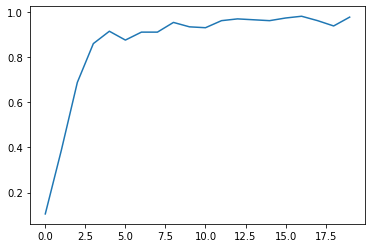

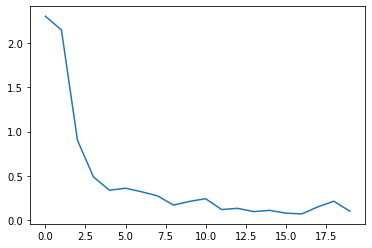

In [0]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail3**

relu---> tanh

In [0]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))

NameError: ignored

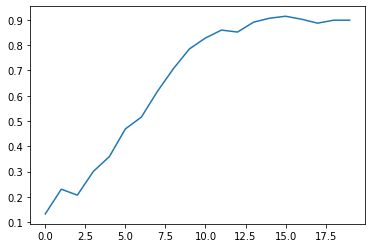

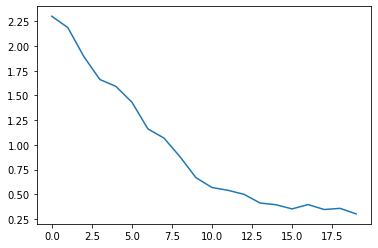

In [0]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail4**
Standard deviation

In [0]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    # I hear adding random noise to inputs helps with generalization!
    img_batch = img_batch + tf.random.normal(tf.shape(img_batch), stddev=0)
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


Loss: 2.30256986618042 Accuracy: 0.16015625
Loss: 2.300718307495117 Accuracy: 0.125
Loss: 2.3017051219940186 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.300215244293213 Accuracy: 0.1328125
Loss: 2.2945611476898193 Accuracy: 0.10546875
Starting new epoch...
Loss: 1.9963457584381104 Accuracy: 0.23828125
Loss: 1.1695232391357422 Accuracy: 0.55078125
Starting new epoch...
Loss: 0.9697867631912231 Accuracy: 0.6640625
Loss: 0.6115125417709351 Accuracy: 0.80859375
Loss: 0.6549678444862366 Accuracy: 0.82421875
Starting new epoch...
Loss: 0.5019491314888 Accuracy: 0.8359375
Loss: 0.4819658398628235 Accuracy: 0.859375
Starting new epoch...
Loss: 0.32324832677841187 Accuracy: 0.8984375
Loss: 0.4102395176887512 Accuracy: 0.88671875
Starting new epoch...
Loss: 0.27176761627197266 Accuracy: 0.921875
Loss: 0.3748054504394531 Accuracy: 0.89453125
Loss: 0.32096755504608154 Accuracy: 0.9140625
Starting new epoch...
Loss: 0.38170069456100464 Accuracy: 0.90625
Loss: 0.21580837666988373 Accuracy: 0.

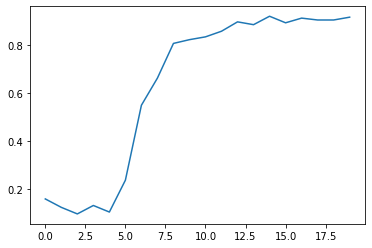

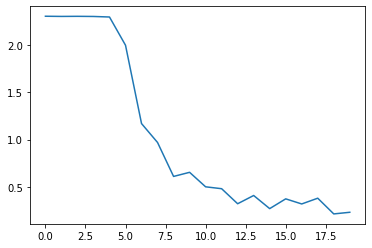

In [0]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)

# **Fail5**

In [0]:
# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# finally add the softmax output layer :))
layers.append(tf.keras.layers.Dense(
    10, activation=tf.nn.softmax,
    kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                     maxval=0.01)))
accuracy=[]
loss=[]
lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        accuracy.append(acc)
        loss.append(xent)
        print("Loss: {} Accuracy: {}".format(xent, acc))


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))

Loss: 2.3025870323181152 Accuracy: 0.05859375
Loss: 2.302578926086426 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.3026304244995117 Accuracy: 0.09765625
Loss: 2.3026819229125977 Accuracy: 0.0546875
Starting new epoch...
Loss: 2.3026680946350098 Accuracy: 0.08984375
Loss: 2.3025474548339844 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.3027849197387695 Accuracy: 0.07421875
Loss: 2.302042245864868 Accuracy: 0.15234375
Loss: 2.3022236824035645 Accuracy: 0.125
Starting new epoch...
Loss: 2.3024818897247314 Accuracy: 0.109375
Loss: 2.30204439163208 Accuracy: 0.1171875
Starting new epoch...
Loss: 2.3019840717315674 Accuracy: 0.109375
Loss: 2.302267551422119 Accuracy: 0.109375
Starting new epoch...
Loss: 2.302340507507324 Accuracy: 0.1015625
Loss: 2.301727294921875 Accuracy: 0.14453125
Loss: 2.302422523498535 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.301337242126465 Accuracy: 0.125
Loss: 2.302631378173828 Accuracy: 0.09765625
Starting new epoch...
Loss: 2.302058696746826 A

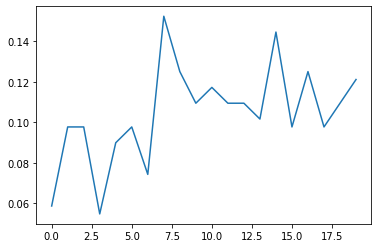

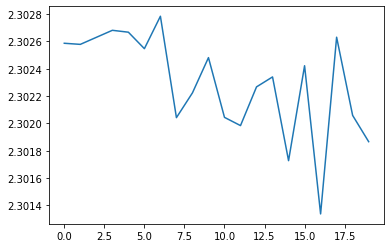

In [0]:
plt.plot(accuracy)
plt.figure()
plt.plot(loss)